In [1]:
# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2

# Machine learning:
Construir modelos para predecir, generar o explorar datos

El proceso de machine learning se puede representar con cuatro bloques:
- Bloque 1: Los datos
- Bloque 2: El modelo
- Bloque 3: Inferencia o estimación de parámetros desconocidos (Tecnicas de optimización)
- Bloque 4: Predicción, exploración (encontrar estructura), generación

Dados los datos y definido el modelo queremos estimar los parámetros desconocidos del modelo para despues utilizar el modelo para predecir o generar datos.

La diferencia entre supervisado y no supervisado se puede entender por las diferencias entre el bloque 1 y el bloque 4. 

Supervisado:
- Bloque 1: tiene datos anotados
- Bloque 4: quiero predecir una salida en función de una entrada

No supervisado:
- Bloque 1: es un conjunto de datos no anotados
- Bloque 4: Quiero estructurar los datos: Topicos en un conjunto de articulos. 

Tanto para aprendizaje supervisado como no supervisado tengo un modelo con parámetros desconocidos (bloque 2) y quiero inferir estos parámtros a través de algún algoritmo específico

## Datos
En esta sección utilizaremos los datos como excusa para definir algunos conceptos básicos de la probabilidad.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('alturas-pesos.csv')

In [3]:
df.describe()

,Peso,Altura
count,10000.000000,10000.000000
mean,72.733900,168.073300
std,14.572204,9.775269
min,29.000000,137.000000
25%,61.000000,161.000000
50%,73.000000,168.000000
75%,84.000000,175.000000
max,122.000000,200.000000


In [4]:
df[:5]

,Sexo,Peso,Altura
0,Hombre,109,187
1,Hombre,73,174
2,Hombre,96,188
3,Hombre,99,182
4,Hombre,93,177


In [5]:
df[-5:]

,Sexo,Peso,Altura
9995,Mujer,62,168
9996,Mujer,77,170
9997,Mujer,58,162
9998,Mujer,74,175
9999,Mujer,51,157


In [6]:
len(df)

10000

In [7]:
from matplotlib import pyplot as plt
from collections import Counter

### Frecuencia de Alturas

Counter({165: 385, 168: 376, 162: 364, 164: 363, 172: 357, 173: 356, 170: 354, 171: 354, 175: 342, 169: 340, 167: 334, 166: 326, 163: 325, 161: 321, 176: 315, 160: 308, 159: 303, 174: 293, 157: 275, 177: 273, 158: 273, 178: 249, 156: 236, 179: 232, 180: 224, 181: 214, 154: 188, 182: 187, 155: 179, 183: 168, 153: 143, 152: 123, 184: 108, 185: 94, 151: 86, 186: 82, 187: 70, 150: 67, 188: 61, 149: 57, 148: 49, 189: 35, 147: 30, 190: 26, 146: 25, 145: 19, 191: 18, 144: 16, 194: 15, 192: 14, 193: 9, 195: 8, 142: 8, 143: 6, 141: 4, 199: 3, 196: 3, 140: 2, 198: 1, 200: 1, 138: 1, 139: 1, 137: 1})


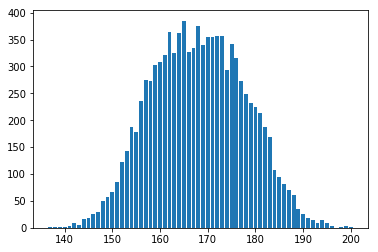

In [8]:
alturas_frec = Counter(df['Altura'])
print(alturas_frec)
plt.bar(alturas_frec.keys(), alturas_frec.values())
plt.show()

### Definición de Probabilidad
Existen diferentes formas de definir la probabilidad, a fines prácticos, vamos a definirla como la frecuencia una salida particular de un experimento sobre la cantidad veces que se realizó el experimento.

Desde un punto de vista formal, la cantidad de veces que realizo el experimento debería tender a infinito para que este método converja a la probabilidad.

Por eso siempre estaremos estimando la probabilidad y no calculando la probabilidad. (Muchas veces diremos "calcular la probabilidad", pero realimente estaremos estimándola)

### Altura: Estimación de la probabilidad

Cual es la estimación de la probabilidad de que una persona (mujer u hombre) mida 175cm?  

$N_{a175}$ = Cantidad de hombres o mujeres que miden 175cm  
$N_{Mujeres}$ = Cantidad de mujeres en el dataset   
$N_{Hombres}$ = Cantidad de hombres en el dataset  

\begin{equation}
P(Altura = 175cm) = \frac{N_{a175}}{N_{Mujeres}+N_{Hombres}}
\end{equation}

In [9]:
P_A_175 = alturas_frec[175]/len(df)
print('Probabilidad:',P_A_175)

Probabilidad: 0.0342


### Notación:
$X_A$ es la variable aleatoria que puede tomar cualquier valor $x_{A_i}$

\begin{equation}
P(X_A = x_{A_i})
\end{equation}

En nuestro ejemplo la altura es nuestra variable aleatoria $X_A$ y 175 es nuestro valor $x_{A_i}$

### Distribución de probabilidad

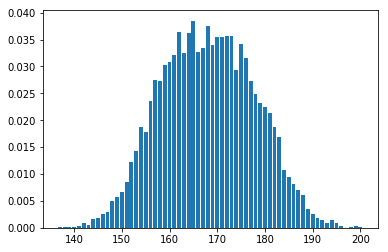

In [44]:
frec_alturas = np.array(list(alturas_frec.values()))
P_alturas = frec_alturas / (N_mujeres + N_hombres)
plt.bar(alturas_frec.keys(), P_alturas)
plt.show()

In [112]:
df['Altura'].mean(), df['Altura'].std()

(168.07329999999999, 9.7752689322734163)

In [56]:
df['Altura'].min()

137

In [48]:
from scipy.stats import norm

In [65]:
rango_alturas = np.linspace(df['Altura'].min(), df['Altura'].max(), 100)

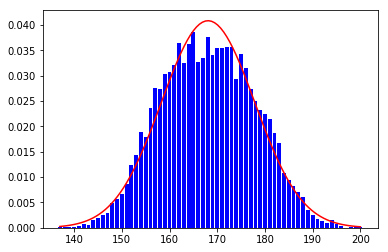

In [118]:
plt.plot(rango_alturas, norm.pdf(rango_alturas, df['Altura'].mean(), df['Altura'].std()), color='r')
plt.bar(alturas_frec.keys(), P_alturas, color='b')
plt.show()

In [98]:
def get_MSE(mean, std, verbose=0):
    error_cuadratico_accum = 0
    for a, f in alturas_frec.items():
        p_est = f/len(df)
        p_est_gauss = norm.pdf(a, mean, std)
        error_cuadratico = (p_est - p_est_gauss)**2
        error_cuadratico_accum = error_cuadratico_accum + error_cuadratico
        if verbose:
            print(a, f/len(df), p_est_gauss, error_cuadratico)
    return error_cuadratico_accum/len(df)

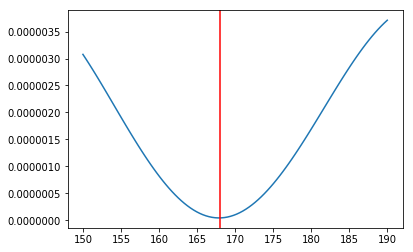

In [108]:
medias = np.linspace(150, 190, 100)
mses = [get_MSE(m, df['Altura'].std()) for m in medias]
plt.plot(medias, mses)
plt.axvline(df['Altura'].mean(), color='r')
plt.show()

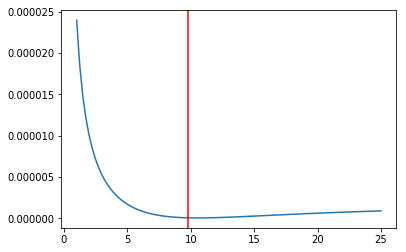

In [117]:
stds = np.linspace(1, 25, 100)
mses = [get_MSE(df['Altura'].mean(), s) for s in stds]
plt.plot(stds, mses)
plt.axvline(df['Altura'].std(), color='r')
plt.show()

### Peso: Estimación de la probabilidad

Counter({62: 265, 64: 247, 79: 242, 84: 237, 82: 237, 63: 237, 87: 235, 60: 235, 85: 232, 59: 231, 80: 227, 61: 226, 66: 225, 65: 225, 83: 214, 58: 212, 56: 211, 73: 207, 68: 207, 78: 204, 67: 204, 76: 202, 88: 201, 89: 201, 81: 200, 69: 199, 74: 199, 75: 197, 90: 196, 71: 194, 70: 191, 57: 191, 72: 185, 77: 185, 86: 182, 55: 178, 92: 165, 91: 160, 93: 152, 54: 151, 53: 150, 52: 128, 94: 126, 95: 116, 51: 116, 50: 110, 96: 98, 49: 85, 48: 74, 97: 71, 98: 70, 46: 68, 99: 54, 47: 51, 100: 43, 101: 43, 45: 40, 44: 35, 103: 31, 43: 28, 102: 24, 104: 21, 41: 20, 42: 17, 105: 15, 40: 11, 109: 10, 107: 7, 38: 7, 39: 6, 108: 5, 106: 4, 35: 4, 115: 3, 113: 3, 112: 3, 111: 2, 114: 2, 32: 2, 37: 2, 116: 1, 122: 1, 110: 1, 31: 1, 36: 1, 29: 1})


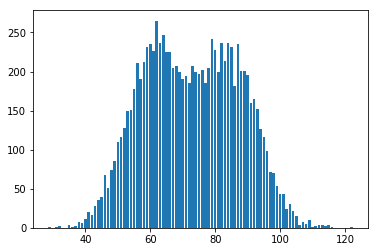

In [10]:
pesos_frec = Counter(df['Peso'])
print(pesos_frec)
plt.bar(pesos_frec.keys(), pesos_frec.values())
plt.show()

Cual es la estimación de la probabilidad de que una persona (mujer u hombre) pese 60kg?  

$X_P$: Es la variable aleatoria que representa a la distribución de los pesos  
$N_{p60}$: Cantidad de hombres o mujeres que pesan 60kg   
$N_{Mujeres}$: Cantidad de mujeres en el dataset   
$N_{Hombres}$: Cantidad de hombres en el dataset  

\begin{equation}
P(X_P = 60) = \frac{N_{p60}}{N_{Mujeres}+N_{Hombres}}
\end{equation}

In [11]:
P_P_60 = pesos_frec[60]/len(df)
print('Probabilidad:',P_P_60)

Probabilidad: 0.0235


### Probabilidad condicional

En muchos casos cuando analizamos los datos, nos interesa dividir los datos de alguna forma.

Dividiremos en mediciones de hombres y mujeres

In [12]:
indices_hombres = df['Sexo'] == 'Hombre'
indices_mujeres = df['Sexo'] == 'Mujer'

In [13]:
alturas_hombres = np.array(df.loc[indices_hombres, 'Altura'])
alturas_mujeres = np.array(df.loc[indices_mujeres, 'Altura'])
pesos_hombres = np.array(df.loc[indices_hombres, 'Peso'])
pesos_mujeres = np.array(df.loc[indices_mujeres, 'Peso'])

In [14]:
N_hombres = indices_hombres.sum()
N_mujeres = indices_mujeres.sum()

Counter({175: 302, 173: 286, 176: 277, 172: 269, 177: 254, 171: 246, 174: 244, 178: 232, 170: 226, 180: 220, 179: 218, 181: 211, 182: 186, 169: 180, 168: 166, 183: 165, 167: 145, 165: 124, 166: 117, 184: 108, 164: 95, 185: 94, 186: 81, 187: 70, 188: 61, 162: 56, 161: 52, 163: 52, 189: 35, 160: 29, 190: 26, 158: 23, 159: 21, 191: 18, 157: 15, 194: 15, 192: 14, 156: 14, 193: 9, 154: 9, 195: 8, 155: 8, 153: 5, 152: 4, 199: 3, 196: 3, 198: 1, 200: 1, 150: 1, 148: 1})


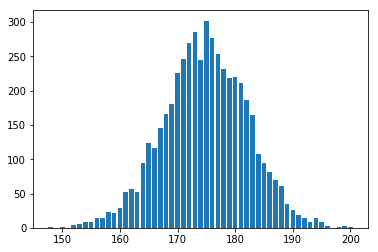

In [15]:
frec_alturas_H = Counter(alturas_hombres)
print(frec_alturas_H)
plt.bar(frec_alturas_H.keys(), frec_alturas_H.values())
plt.show()

\begin{equation}
P(X_A = 175 \ |\ Hombre) = \frac{N_{Ha175}}{N_{Hombres}}
\end{equation}

In [16]:
frec_alturas_H[175]/ N_hombres

0.060400000000000002

Counter({162: 308, 159: 282, 160: 279, 163: 273, 161: 269, 164: 268, 165: 261, 157: 260, 158: 250, 156: 222, 168: 210, 166: 209, 167: 189, 154: 179, 155: 171, 169: 160, 153: 138, 170: 128, 152: 119, 171: 108, 172: 88, 151: 86, 173: 70, 150: 66, 149: 57, 174: 49, 148: 48, 175: 40, 176: 38, 147: 30, 146: 25, 177: 19, 145: 19, 178: 17, 144: 16, 179: 14, 142: 8, 143: 6, 141: 4, 180: 4, 181: 3, 183: 3, 140: 2, 182: 1, 138: 1, 139: 1, 186: 1, 137: 1})


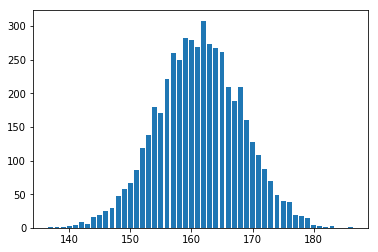

In [17]:
frec_alturas_M = Counter(alturas_mujeres)
print(frec_alturas_M)
plt.bar(frec_alturas_M.keys(), frec_alturas_M.values())
plt.show()

\begin{equation}
P(X_A = 175 \ |\ Mujer) = \frac{N_{Ma175}}{N_{Mujeres}}
\end{equation}

In [18]:
frec_alturas_M[175]/ N_mujeres

0.0080000000000000002

Notar que la probabilidad de que la altura sea 175 es mayor en el hombre que en la mujer como era de esperar intuitivamente

Counter({84: 232, 87: 230, 85: 227, 82: 223, 79: 210, 80: 206, 83: 205, 89: 201, 88: 197, 90: 196, 81: 185, 86: 181, 78: 172, 92: 165, 91: 159, 77: 154, 93: 152, 76: 145, 75: 136, 94: 126, 74: 116, 95: 116, 73: 100, 96: 98, 71: 82, 72: 78, 97: 71, 98: 70, 70: 57, 99: 54, 69: 51, 100: 43, 101: 43, 68: 33, 67: 31, 103: 31, 66: 31, 102: 24, 63: 22, 104: 21, 65: 18, 105: 15, 61: 13, 64: 11, 109: 10, 107: 7, 62: 7, 108: 5, 106: 4, 58: 4, 59: 4, 115: 3, 60: 3, 113: 3, 112: 3, 56: 2, 111: 2, 114: 2, 55: 2, 57: 2, 116: 1, 51: 1, 122: 1, 54: 1, 110: 1, 53: 1})


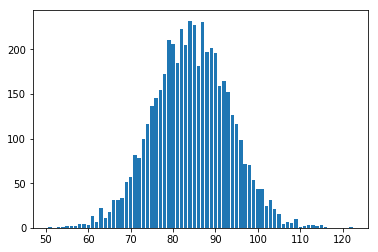

In [19]:
frec_pesos_H = Counter(pesos_hombres)
print(frec_pesos_H)
plt.bar(frec_pesos_H.keys(), frec_pesos_H.values())
plt.show()

\begin{equation}
P(X_P = 65 \ |\ Hombre) = \frac{N_{Hp65}}{N_{Hombres}}
\end{equation}

In [20]:
frec_pesos_H[65]/ N_hombres

0.0035999999999999999

Counter({62: 258, 64: 236, 60: 232, 59: 227, 63: 215, 61: 213, 56: 209, 58: 208, 65: 207, 66: 194, 57: 189, 55: 176, 68: 174, 67: 173, 54: 150, 53: 149, 69: 148, 70: 134, 52: 128, 51: 115, 71: 112, 50: 110, 72: 107, 73: 107, 49: 85, 74: 83, 48: 74, 46: 68, 75: 61, 76: 57, 47: 51, 45: 40, 44: 35, 79: 32, 78: 32, 77: 31, 43: 28, 80: 21, 41: 20, 42: 17, 81: 15, 82: 14, 40: 11, 83: 9, 38: 7, 39: 6, 85: 5, 84: 5, 87: 5, 88: 4, 35: 4, 32: 2, 37: 2, 31: 1, 36: 1, 86: 1, 29: 1, 91: 1})


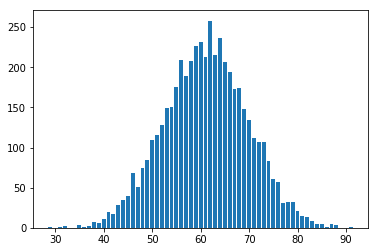

In [21]:
frec_pesos_M = Counter(pesos_mujeres)
print(frec_pesos_M)
plt.bar(frec_pesos_M.keys(), frec_pesos_M.values())
plt.show()

\begin{equation}
P(X_P = 65 \ |\ Mujer) = \frac{N_{Mp65}}{N_{Mujeres}}
\end{equation}

In [22]:
frec_pesos_M[65]/ N_mujeres

0.041399999999999999

### Probabilidad Conjunta

Espacio muestral de peso y altura

In [23]:
frec_conjunta_H = Counter([(p, alturas_hombres[i]) for i, p in enumerate(pesos_hombres)])
conjunta_H = np.zeros([max(pesos_hombres) - min(pesos_hombres) + 1, max(alturas_hombres)-min(alturas_hombres) + 1])
for (p,a), f in frec_conjunta_H.items():
    conjunta_H[p-min(pesos_hombres), a- min(alturas_hombres)] = f

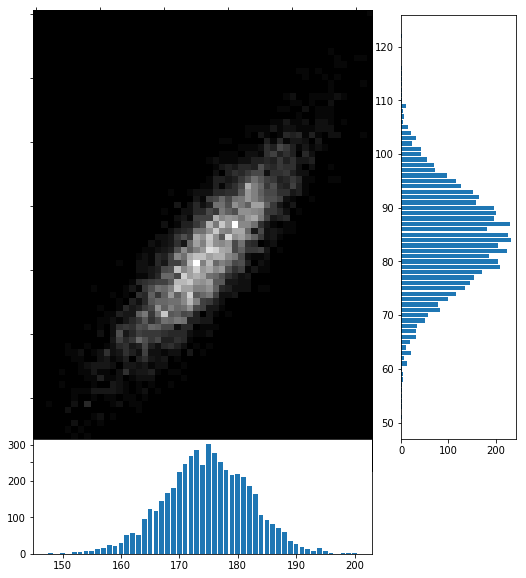

In [24]:
from helper import plot_joint_hists
plot_joint_hists(conjunta_H, frec_alturas_H, frec_pesos_H)

Dada la conjunta puedo obtener las marginales y las condicionales

In [25]:
# Supongamos que quiero obtener la probabildad de que el peso sea 80
f_80 = 0
for (p,a), f in frec_conjunta_H.items():
    # Recorro toda la conjunta
    if p == 80:
        # Si el peso es 80 sumo la cantidad, independientemente de la altura
        f_80 = f_80 + f

In [26]:
# Si a la frecuencia la divido por la cantidad obtengo la probabilidad
f_80 / N_hombres

0.041200000000000001

In [27]:
# Si queremos obtener ahora la condicional: La distribución de alturas dado que el peso es 80
f_a_80 = {}
for (p,a), f in frec_conjunta_H.items():
    # Recorro toda la conjunta
    if p == 80:
        if a not in f_a_80:
            f_a_80[a] = 0
        # Si el peso es 80 sumo la cantidad, independientemente de la altura
        f_a_80[a] = f_a_80[a] + f

In [28]:
f_a_80

{163: 1,
 164: 5,
 165: 6,
 166: 7,
 167: 8,
 168: 8,
 169: 11,
 170: 23,
 171: 23,
 172: 25,
 173: 19,
 174: 18,
 175: 20,
 176: 11,
 177: 11,
 178: 3,
 179: 3,
 180: 2,
 181: 2}

In [29]:
# Estricamente hablando es la condicional dado que es hombre y dado que el peso vale 80

In [30]:
frec_pesos_H[80]/N_hombres * frec_alturas_H[175]/N_hombres

0.0024884800000000004

In [31]:
frec_alturas_H[175]

302

\begin{equation}
P(X_P = 80, X_A = 175) = P(X_P = 80 \ |\  X_A = 175) P(X_A = 175)
\end{equation}

Notar que $P(X_P = 80 \ |\  X_A = 175)$ es frec_conjunta_H[(80, 175)] pero dividido por la frecuencia de alturas en 175.

La probabilidad conjunta seria frec_conjunta_H[(80, 175)] dividido por el total de hombres

\begin{equation}
P(X_P = 80, X_A = 175) = \frac{N_{p80, a75}}{N_{a175}} \frac{N_{a175}}{N}
\end{equation}


In [32]:
frec_conjunta_H[(80, 175)]/frec_alturas_H[175]

0.06622516556291391

In [33]:
(pesos_hombres[alturas_hombres == 175] == 80).sum()/frec_alturas_H[175] * frec_alturas_H[175]/N_hombres

0.0040000000000000001

In [34]:
frec_pesos_H[80]/frec_alturas_H[175] * frec_alturas_H[175]/N_hombres

0.041200000000000001

In [35]:

frec_conjunta_H[(80, 170)]

23

In [36]:
frec_conjunta_M = Counter([(p, alturas_mujeres[i]) for i, p in enumerate(pesos_mujeres)])
conjunta_M = np.zeros([max(pesos_mujeres) - min(pesos_mujeres) + 1, 
                       max(alturas_mujeres)-min(alturas_mujeres) + 1])
for (p,a), f in frec_conjunta_M.items():
    conjunta_M[p-min(pesos_mujeres), a- min(alturas_mujeres)] = f

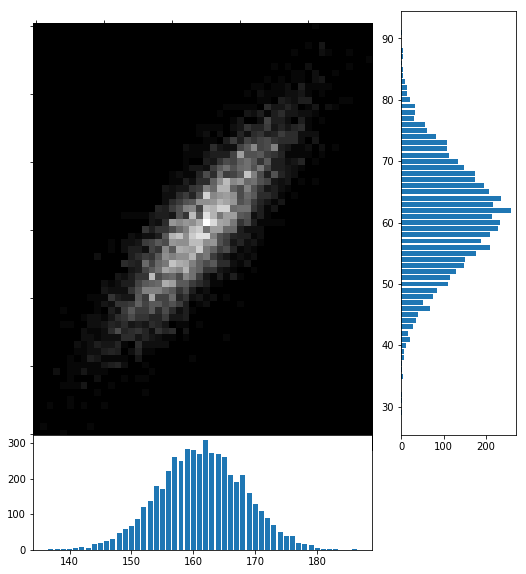

In [37]:
plot_joint_hists(conjunta_M, frec_alturas_M, frec_pesos_M)

## Que es un modelo?